In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, style

style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Анализ имеющихся  признаков

#### Для начала посмотрим что из себя представляет датасет:

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Из статистики в тренировочном и тестовом детасетах становится понятно, что есть опреденные проблемы с категориями Age, Fare и Cabin, где есть отсутствующие значения, при анализе надо это учитывать. 

In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<ul>
<li>PassengerId - Идентификатор пассажира. Вряд ли от него можно получить какую-то пользу.</li>
<li>Survived - Целевая переменная выжил/невыжил, которую надо найти - бинарный признак.</li>
<li>Pclass - Пассажирский класс - количественный признак (1 - первый; 2 - второй; 3 - третий).</li>
<li>Name - Имя пассажира - категориальный признак.</li>
<li>Sex - Пол пассажира - категориальный признак, который можно преобразовать в бинарный.</li>
<li>Age - Возраст пассажира - количественный признак - количественный признак.</li>
<li>SibSp - Количество братьев/сестер на борту коробля - количественный признак.</li>
<li>Parch - Количество родителей/детей на борту коробля - количественный признак.</li>
<li>Ticket - Номер билета - категориальный признак.</li>
<li>Fare - Цена билета - количественный признак.</li>
<li>Cabin - Номера каюты - категориальный признак.</li>
<li>Embarked - Место посадки (C - Cherbourg; Q - Queenstown; S - Southampton) - категориальный признак.</li>
</ul>

### Проведем небольшой анализ данных, чтобы понять какие нужны и как их лучше преобразовать

Для начала надо подумать, что делать с пропущенными значениями, думаю, что самый оптимальный вариант, это заполнить их медианными значениями для количественных признаков.

In [9]:
df = df.fillna(df.median(axis=0), axis=0)

#### Для начала посмотрим распреденение погибших и выживших:

In [10]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Теперь посмотрим  распреденение погибших и выживших по полу, для этого преобразуем категориальный признак в количественный:

In [11]:
df['SexCode'] = df['Sex'].map(lambda sex: 1 if sex == 'male' else 0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


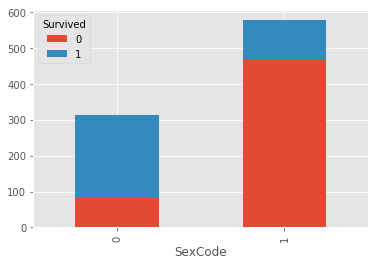

In [12]:
df.groupby(['SexCode', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, что в процентном соотношении, женщин погибло гораздо меньше чем мужчин. Возьмем этот факт на заметку.

#### Теперь посмотрим распреденение по классу:

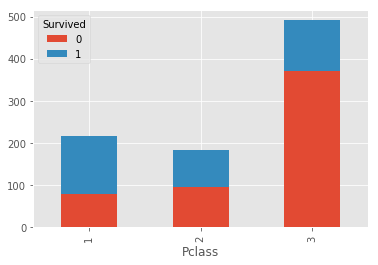

In [13]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Видно, что в 1-ом (самом дорогом и самом близким к палубе) классе выживших больше всего, тогда как в 3-м ситуация ровно противоположная.

#### Проверим, стоит ли использовать категорию Fare или лучше ориентироваться на класс:

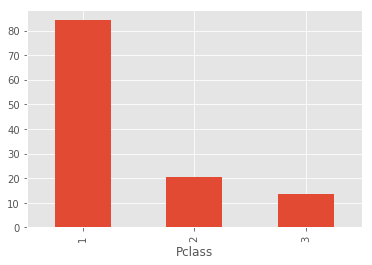

In [14]:
df.groupby('Pclass')['Fare'].mean().plot(kind='bar');

In [15]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [16]:
df[df['Fare'] > 0].groupby('Pclass')['Fare'].min()

Pclass
1     5.0000
2    10.5000
3     4.0125
Name: Fare, dtype: float64

Несмотря на то, что в среднем билеты 1-го класса стоят намного дороже чем 2-го и 3-го, но наблдается большая разница между самым дорогим и самым дешевым билетом, особенно в 1-ом классе. Пока непонятно что делать с этим признаком.

#### Теперь посмотрим на влияние наличия/отсутствия родственников:

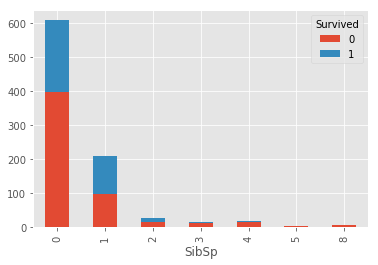

In [17]:
df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

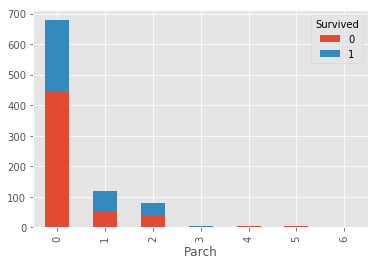

In [18]:
df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, наличие хотя бы одного родственника на борту несколько повышает шанс на спасение. Попробуем добвить еще и пол к этим графикам.

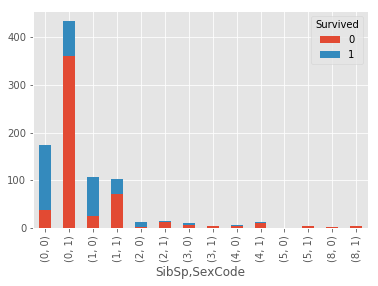

In [19]:
df.groupby(['SibSp', 'SexCode', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

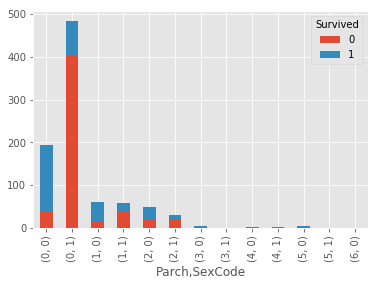

In [20]:
df.groupby(['Parch', 'SexCode', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, наличие родственников на борту лучше сказывается на женщинах, чем мужчинах. Поробуем установить родственные связи, для этого выделим фамилию в отдельный признак и посмотрим, что получится.

In [21]:
df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
df[(df['SibSp'] > 0) | (df['Parch'] > 0)].sort_values(['Surname']).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Surname
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S,1,Abbott
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.2500,NaN,S,0,Abbott
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,1,0,P/PP 3381,24.0000,NaN,C,0,Abelson
308,309,0,2,"Abelson, Mr. Samuel",male,30.00,1,0,P/PP 3381,24.0000,NaN,C,1,Abelson
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S,0,Ahlin
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,392091,9.3500,NaN,S,0,Aks
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,1,Allison
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,0,Allison
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0,Allison
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.00,1,0,350046,7.8542,NaN,S,0,Andersen-Jensen


Можно заметить, что наличие родственников можно определить не только по фамилий, но и (вполне возможно), что и по единому номеру билета. С другой стороны, не для всех пассажиров указаны все родственники (как для фамилии Aks или Ahlin), возможно это связано с разделением на тестовую и тренировочную выборки, поэтому это не может являться надежной категорией для исследования. С другой стороны, наличия родителя Parch и возраст, скажем, до 16-ти лет, может довольно четко дать понять, что это ребенок с родителями. Проверим это предположение.

In [22]:
df[(df['Parch'] > 0) & (df['Age'] <= 18)]['Survived'].value_counts(normalize=True)

1    0.561798
0    0.438202
Name: Survived, dtype: float64

In [23]:
df[df['Age'] <= 18]['Survived'].value_counts(normalize=True)

1    0.503597
0    0.496403
Name: Survived, dtype: float64

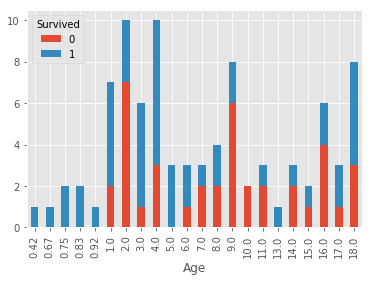

In [24]:
df[(df['Parch'] > 0) & (df['Age'] <= 18)] \
    .groupby(['Age', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

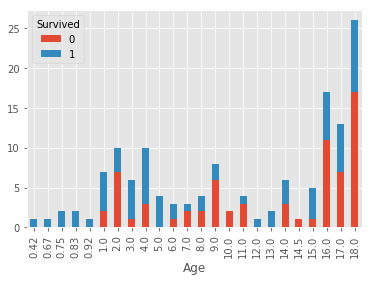

In [25]:
df[df['Age'] <= 18] \
    .groupby(['Age', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, быть ребенком с родителями сильно увеличивает шанс на спасение по сравнению с "рядовым" пассажиром, поэтому выделим это в отдельный признак.

In [26]:
df['IsChild'] = df.apply(lambda row: 1 if row['Age'] <= 18 and row['Parch'] > 0 else 0, axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Surname,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Allen,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,Moran,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,McCarthy,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Palsson,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,Johnson,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,Nasser,0


In [27]:
df[df['Parch'] > 0]['Survived'].value_counts(normalize=True)

1    0.511737
0    0.488263
Name: Survived, dtype: float64

Как можно заметить, наличие родителей или детей в определенной степени также повышает вероятность выжить, поэтому будем учитывать и этот признак тоже.

#### Раз уж затронули тему возраста, то исследуем еще и распределение по нему:

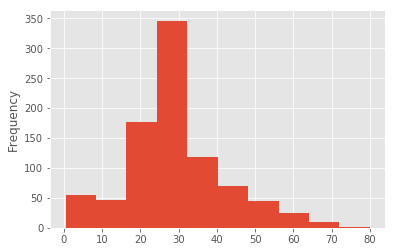

In [28]:
df['Age'].plot(kind='hist')

In [29]:
df['Age'].mean()

29.36158249158249

Так как напрямую работать с возрастом не очень удобно, то разобьем его на группы. А отсутствующие значения заменим нулями.

In [30]:
df['AgeGroup'] = df['Age']
df['AgeGroup'] = df['AgeGroup'].map(lambda age: int(age // 10) + 1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Surname,IsChild,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Futrelle,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Allen,0,4
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,Moran,0,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,McCarthy,0,6
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Palsson,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,Johnson,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,Nasser,0,2


In [31]:
df['AgeGroup'].value_counts()

3    397
4    167
2    102
5     89
1     62
6     48
7     19
8      6
9      1
Name: AgeGroup, dtype: int64

Получились следующие группы 0 - для тех у кого возраст не указан, 1 - возраст от 0 до 9 лет, 2 - от 10 до 19 и т.д. Из них - самая многочисленная группа 3 - от 20 до 29 лет.

#### В итоге, после краткого анализа можно определиться со следующими признаками, которые могут оказать влияние на качество обучения:

<ul>
<li>Pclass - Пассажирский класс - количественный признак (1 - первый; 2 - второй; 3 - третий).</li>
<li>SexCode - Пол пассажира - бинарный признак.</li>
<li>Parch - Количество родителей/детей на борту коробля - количественный признак.</li>
<li>IsChild - Является ли пассажир ребенком - бинарный признак.</li>
<li>AgeGroup - Возрастная группа пассажира - порядковый признак.</li>
</ul>

#### Оставим еще следующие признаки, которые, теоретически, должны улучшить результат:

<ul>
<li>SibSp - Количество братьев/сестер на борту коробля - количественный признак.</li>
<li>Fare - Цена билета - количественный признак.</li>
</ul>

### Для попробуем протестировать модель на тренировочных данных

#### Помимо лишних признаков я удаляю и PassengerId, т.к. он сильно ухудшает качество предсказания для kNN.

In [32]:
x_train = df.drop(([
    'PassengerId', 
    'Age', 
    'Survived', 
    'Name', 
    'Sex', 
    'Ticket',
    'Cabin',
    'Embarked',
    'Surname'
]), axis=1)

print(x_train.shape)
x_train.head(10)

(891, 7)


,Pclass,SibSp,Parch,Fare,SexCode,IsChild,AgeGroup
0,3,1,0,7.2500,1,0,3
1,1,1,0,71.2833,0,0,4
2,3,0,0,7.9250,0,0,3
3,1,1,0,53.1000,0,0,4
4,3,0,0,8.0500,1,0,4
5,3,0,0,8.4583,1,0,3
6,1,0,0,51.8625,1,0,6
7,3,3,1,21.0750,1,1,1
8,3,0,2,11.1333,0,0,3
9,2,1,0,30.0708,0,0,2


Теперь необходимо сделать нормализацию данных, это необходимо как в случае с kNN, так и с логистической регрессией.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.82737724,  0.43279337, -0.47367361, ...,  0.73769513,
        -0.33312545, -0.31048834],
       [-1.56610693,  0.43279337, -0.47367361, ..., -1.35557354,
        -0.33312545,  0.42723196],
       [ 0.82737724, -0.4745452 , -0.47367361, ..., -1.35557354,
        -0.33312545, -0.31048834],
       ..., 
       [ 0.82737724,  0.43279337,  2.00893337, ..., -1.35557354,
        -0.33312545, -0.31048834],
       [-1.56610693, -0.4745452 , -0.47367361, ...,  0.73769513,
        -0.33312545, -0.31048834],
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  0.73769513,
        -0.33312545,  0.42723196]])

In [35]:
y_train = df['Survived']
y_train.shape

(891,)

#### kNN – метод ближайших соседей:

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<p>Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.</p>
<p>Найдем наилучшее значение k среди значений от 0 до 15:</p>

In [37]:
from sklearn.grid_search import GridSearchCV
n_neighbors_array = range(1, 16)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(grid.best_score_, best_n_neighbors)

/Users/andrewlarin/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/andrewlarin/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(0.8237934904601572, 6)


Как видно, наилучшее значение k равно 6, посчитаем accuracy_score для него.

In [38]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [39]:
accuracy_score(y_train, knn.predict(x_train))

0.86195286195286192

#### Логистическая регрессия:

In [40]:
from sklearn.linear_model import LogisticRegressionCV

In [41]:
lr = LogisticRegressionCV(cv=10)
lr.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [42]:
lr.scores_

{1: array([[ 0.61111111,  0.61111111,  0.73333333,  0.8       ,  0.81111111,
          0.81111111,  0.81111111,  0.81111111,  0.81111111,  0.81111111],
        [ 0.61111111,  0.62222222,  0.73333333,  0.78888889,  0.76666667,
          0.77777778,  0.77777778,  0.77777778,  0.77777778,  0.77777778],
        [ 0.61797753,  0.62921348,  0.76404494,  0.78651685,  0.78651685,
          0.7752809 ,  0.7752809 ,  0.7752809 ,  0.7752809 ,  0.7752809 ],
        [ 0.61797753,  0.65168539,  0.85393258,  0.84269663,  0.82022472,
          0.82022472,  0.82022472,  0.82022472,  0.82022472,  0.82022472],
        [ 0.61797753,  0.64044944,  0.78651685,  0.79775281,  0.80898876,
          0.80898876,  0.80898876,  0.80898876,  0.80898876,  0.80898876],
        [ 0.61797753,  0.60674157,  0.83146067,  0.7752809 ,  0.7752809 ,
          0.7752809 ,  0.7752809 ,  0.7752809 ,  0.7752809 ,  0.7752809 ],
        [ 0.61797753,  0.62921348,  0.79775281,  0.78651685,  0.79775281,
          0.79775281,  0.7977

In [43]:
lr.scores_[1].mean(axis=0).max()

0.80249205538531387

In [44]:
accuracy_score(y_train, lr.predict(x_train))

0.80695847362514028

Как видно, на этапе кросс валидации и в случае accuracy_score, kNN показывает лучшие результаты, чем логистическая регрессия. Поэтому оставим именно этот алгоритм.

### Теперь подготовим тестовую выборку

In [45]:
df_test = df_test.fillna(df_test.median(axis=0), axis=0)

df_test['SexCode'] = df_test['Sex'].map(lambda sex: 1 if sex == 'male' else 0)

df_test['IsChild'] = df_test.apply(lambda row: 1 if row['Age'] <= 18 and row['Parch'] > 0 else 0, axis=1)

df_test['AgeGroup'] = df_test['Age']

df_test['AgeGroup'] = df_test['AgeGroup'].map(lambda age: int(age // 10) + 1)

df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,IsChild,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,4
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,7
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,3
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,0,2
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,0,4
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1,0,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,0,2
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1,0,3


In [46]:
x_test = df_test.drop(([
    'PassengerId', 
    'Age', 
    'Name', 
    'Sex', 
    'Ticket',
    'Cabin',
    'Embarked',
]), axis=1)

print(x_test.shape)
x_test.head(10)

(418, 7)


,Pclass,SibSp,Parch,Fare,SexCode,IsChild,AgeGroup
0,3,0,0,7.8292,1,0,4
1,3,1,0,7.0000,0,0,5
2,2,0,0,9.6875,1,0,7
3,3,0,0,8.6625,1,0,3
4,3,1,1,12.2875,0,0,3
5,3,0,0,9.2250,1,0,2
6,3,0,0,7.6292,0,0,4
7,2,1,1,29.0000,1,0,3
8,3,0,0,7.2292,0,0,2
9,3,2,0,24.1500,1,0,3


In [47]:
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.87348191, -0.49947002, -0.4002477 , ...,  0.75592895,
        -0.29277002,  0.40306346],
       [ 0.87348191,  0.61699237, -0.4002477 , ..., -1.32287566,
        -0.29277002,  1.17238094],
       [-0.31581919, -0.49947002, -0.4002477 , ...,  0.75592895,
        -0.29277002,  2.71101591],
       ..., 
       [ 0.87348191, -0.49947002, -0.4002477 , ...,  0.75592895,
        -0.29277002,  0.40306346],
       [ 0.87348191, -0.49947002, -0.4002477 , ...,  0.75592895,
        -0.29277002, -0.36625402],
       [ 0.87348191,  0.61699237,  0.61989583, ...,  0.75592895,
        -0.29277002, -0.36625402]])

#### Создадим 2 предсказания для kNN и для логистической регрессии на случай, если первый покажет плохие результату на тестовых данных:

In [48]:
y_test = knn.predict(x_test)

In [49]:
df_predicted = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})

In [50]:
df_predicted.to_csv('sample_submission_knn.csv', sep=',', index=False)

#### Теперь тоже самое для логистической регрессии:

In [51]:
y_test = lr.predict(x_test)

In [52]:
df_predicted2 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})

In [53]:
df_predicted2.to_csv('sample_submission_lr.csv', sep=',', index=False)